In [16]:
!pip install numpy scipy matplotlib torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

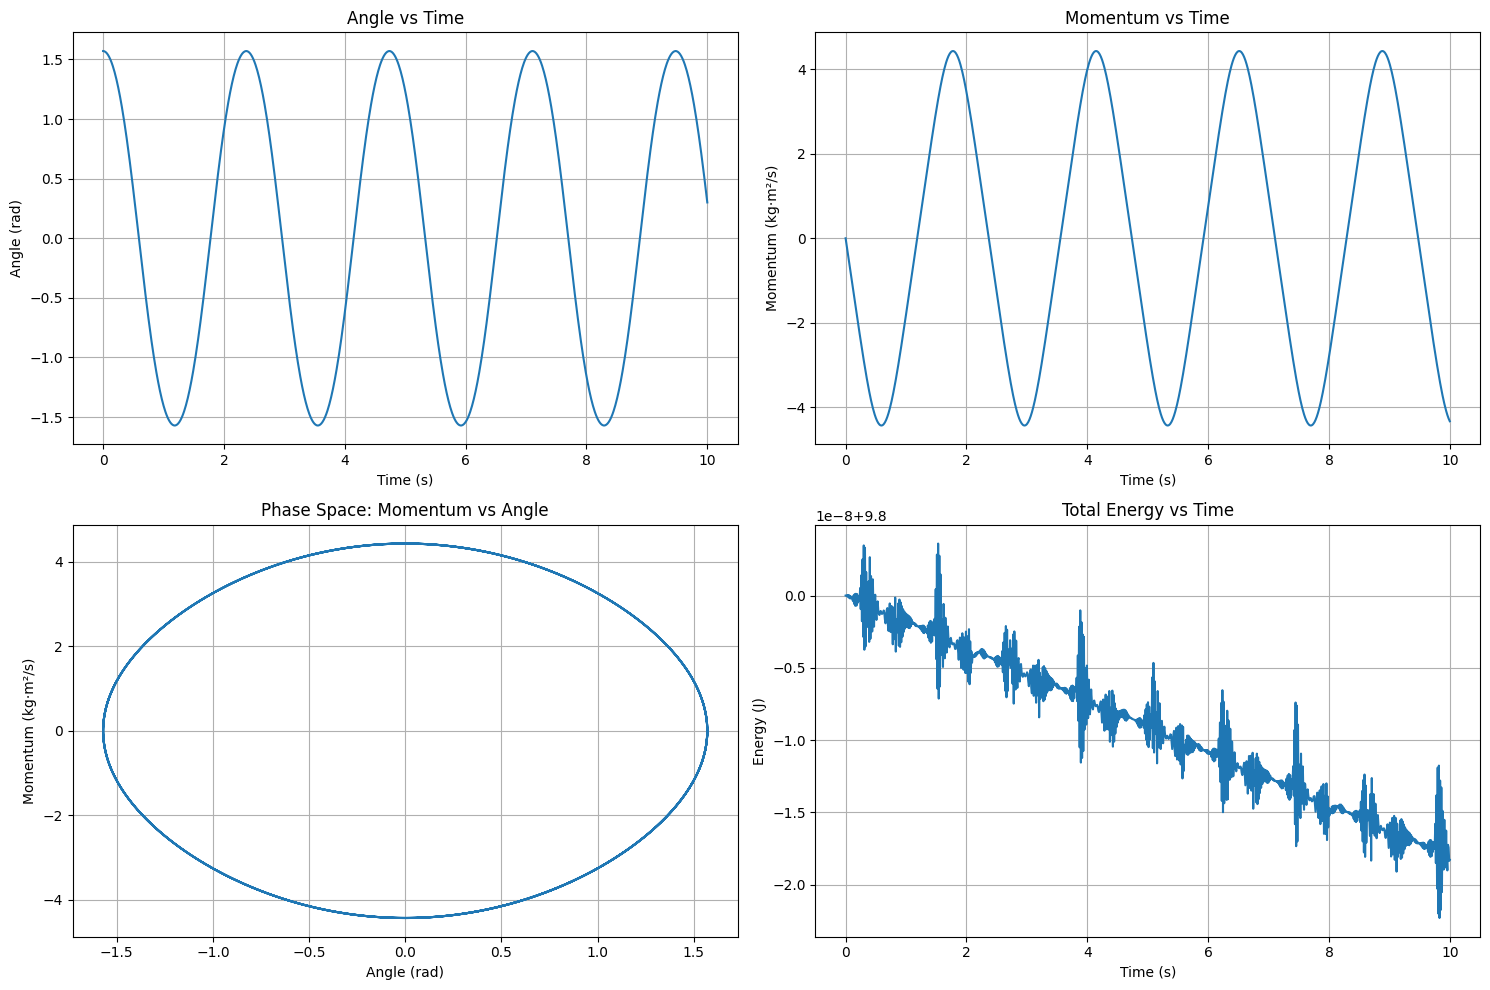

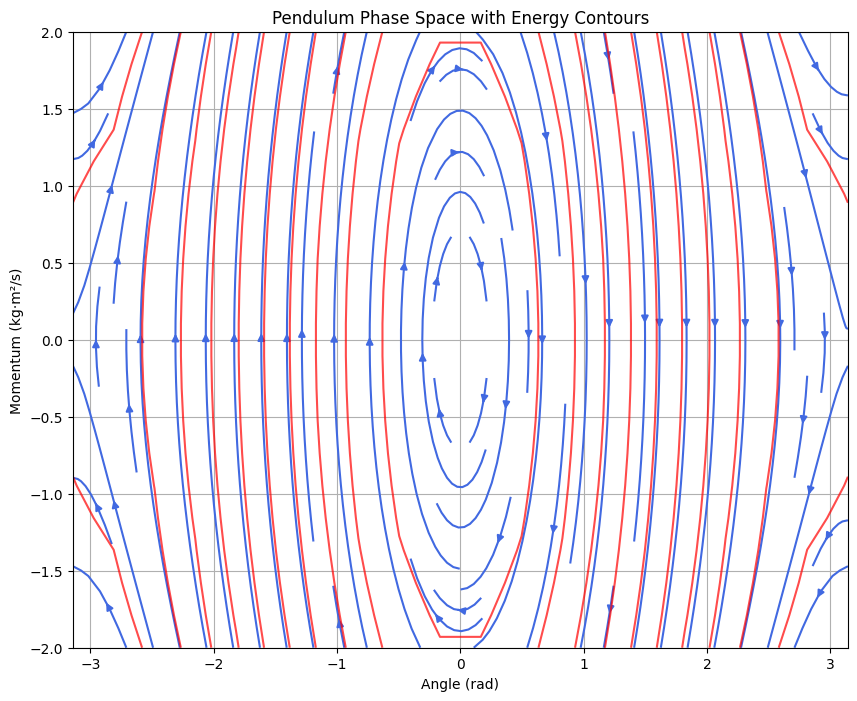

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def hamiltonian(theta, p, L=1.0, m=1.0, g=9.8):
    """Compute the Hamiltonian (total energy) of a pendulum."""
    T = p**2 / (2 * m * L**2)  # Kinetic energy
    V = m * g * L * (1 - np.cos(theta))  # Potential energy
    return T + V

def hamilton_equations(t, state, L=1.0, m=1.0, g=9.8):
    """Compute derivatives according to Hamilton's equations."""
    theta, p = state
    dtheta_dt = p / (m * L**2)  # ∂H/∂p
    dp_dt = -m * g * L * np.sin(theta)  # -∂H/∂theta
    return [dtheta_dt, dp_dt]

# Initial conditions and simulation parameters
theta0, p0 = np.pi/2, 0.0  # Initial angle (90 degrees), zero initial momentum
state0 = [theta0, p0]
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the ODE system
solution = solve_ivp(
    hamilton_equations, t_span, state0,
    method='RK45', t_eval=t_eval, rtol=1e-10, atol=1e-10
)

t, theta, p = solution.t, solution.y[0], solution.y[1]
energy = np.array([hamiltonian(th, mom) for th, mom in zip(theta, p)])

# Create visualization
plt.figure(figsize=(15, 10))

# Angle vs Time
plt.subplot(2, 2, 1)
plt.plot(t, theta)
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Angle vs Time')
plt.grid(True)

# Momentum vs Time
plt.subplot(2, 2, 2)
plt.plot(t, p)
plt.xlabel('Time (s)')
plt.ylabel('Momentum (kg·m²/s)')
plt.title('Momentum vs Time')
plt.grid(True)

# Phase Space: Momentum vs Angle
plt.subplot(2, 2, 3)
plt.plot(theta, p)
plt.xlabel('Angle (rad)')
plt.ylabel('Momentum (kg·m²/s)')
plt.title('Phase Space: Momentum vs Angle')
plt.grid(True)

# Energy vs Time
plt.subplot(2, 2, 4)
plt.plot(t, energy)
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Total Energy vs Time')
plt.grid(True)

plt.tight_layout()
plt.show()

# Create a phase space streamplot
plt.figure(figsize=(10, 8))
theta_grid = np.linspace(-np.pi, np.pi, 20)
p_grid = np.linspace(-2, 2, 20)
THETA, P = np.meshgrid(theta_grid, p_grid)

L = 1.0  # Length of pendulum (m)
m = 1.0  # Mass (kg)
g = 9.8  # Gravity (m/s²)


# Calculate vector field
dTHETA = P / (m * L**2)
dP = -m * g * L * np.sin(THETA)

# Calculate Hamiltonian values for contour lines
H_grid = hamiltonian(THETA, P)

# Create streamplot
plt.streamplot(THETA, P, dTHETA, dP, color='royalblue', density=1.0)
plt.contour(THETA, P, H_grid, levels=10, colors='red', alpha=0.7)
plt.xlabel('Angle (rad)')
plt.ylabel('Momentum (kg·m²/s)')
plt.title('Pendulum Phase Space with Energy Contours')
plt.grid(True)
plt.show()


In [2]:
class HamiltonianNN:
    """Simple Hamiltonian Neural Network implementation using NumPy."""

    def __init__(self, layer_sizes):
        self.num_layers = len(layer_sizes) - 1
        self.layer_sizes = layer_sizes

        # Initialize weights and biases
        self.weights = []
        self.biases = []

        for i in range(self.num_layers):
            # He initialization
            w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(2/layer_sizes[i])
            b = np.zeros(layer_sizes[i+1])

            self.weights.append(w)
            self.biases.append(b)

    def forward(self, x):
        """Forward pass through the network."""
        activations = x

        # Pass through hidden layers with tanh activation
        for i in range(self.num_layers - 1):
            z = np.dot(activations, self.weights[i]) + self.biases[i]
            activations = np.tanh(z)

        # Final layer (no activation for Hamiltonian output)
        z = np.dot(activations, self.weights[-1]) + self.biases[-1]

        return z

    def hamiltonian_gradients(self, coords):
        """Compute gradients of the Hamiltonian w.r.t. inputs."""
        input_coords = coords.copy()

        # Compute dH/dtheta using finite differences
        eps = 1e-6
        input_plus_eps = input_coords.copy()
        input_minus_eps = input_coords.copy()

        input_plus_eps[:, 0] += eps
        input_minus_eps[:, 0] -= eps

        dH_dtheta = (self.forward(input_plus_eps) - self.forward(input_minus_eps)) / (2 * eps)

        # Compute dH/dp using finite differences
        input_plus_eps = input_coords.copy()
        input_minus_eps = input_coords.copy()

        input_plus_eps[:, 1] += eps
        input_minus_eps[:, 1] -= eps

        dH_dp = (self.forward(input_plus_eps) - self.forward(input_minus_eps)) / (2 * eps)

        return dH_dtheta, dH_dp

    def dynamics(self, t, state):
        """Compute derivatives using Hamilton's equations."""
        state_reshaped = np.array([state]).reshape(1, -1)

        dH_dtheta, dH_dp = self.hamiltonian_gradients(state_reshaped)

        dtheta_dt = dH_dp.item()  # ∂H/∂p
        dp_dt = -dH_dtheta.item()  # -∂H/∂theta

        return [dtheta_dt, dp_dt]


In [3]:
class SimplifiedVJEPA:
    """Simplified V-JEPA implementation for pendulum physics learning."""

    def __init__(self, input_dim, latent_dim):
        self.input_dim = input_dim
        self.latent_dim = latent_dim

        # Initialize encoder weights and biases
        self.encoder_w1 = np.random.randn(input_dim, 16) * 0.1
        self.encoder_b1 = np.zeros(16)
        self.encoder_w2 = np.random.randn(16, latent_dim) * 0.1
        self.encoder_b2 = np.zeros(latent_dim)

        # Initialize predictor weights and biases
        self.predictor_w1 = np.random.randn(latent_dim, 16) * 0.1
        self.predictor_b1 = np.zeros(16)
        self.predictor_w2 = np.random.randn(16, latent_dim) * 0.1
        self.predictor_b2 = np.zeros(latent_dim)

        # Initialize decoder weights and biases
        self.decoder_w1 = np.random.randn(latent_dim, 16) * 0.1
        self.decoder_b1 = np.zeros(16)
        self.decoder_w2 = np.random.randn(16, input_dim) * 0.1
        self.decoder_b2 = np.zeros(input_dim)

    def encoder(self, x):
        """Encode input to latent representation."""
        h = np.tanh(np.dot(x, self.encoder_w1) + self.encoder_b1)
        z = np.dot(h, self.encoder_w2) + self.encoder_b2
        return z

    def predictor(self, z):
        """Predict future latent representation."""
        h = np.tanh(np.dot(z, self.predictor_w1) + self.predictor_b1)
        z_pred = np.dot(h, self.predictor_w2) + self.predictor_b2
        return z_pred

    def decoder(self, z):
        """Decode latent representation to input space."""
        h = np.tanh(np.dot(z, self.decoder_w1) + self.decoder_b1)
        x_recon = np.dot(h, self.decoder_w2) + self.decoder_b2
        return x_recon


In [4]:
def generate_pendulum_data(n_samples=1000, noise_level=0.01):
    """Generate pendulum dynamics data for training."""
    # Sample random states
    theta = np.random.uniform(-np.pi, np.pi, n_samples)
    p = np.random.uniform(-2, 2, n_samples)

    # Parameters
    L, m, g = 1.0, 1.0, 9.8

    # Compute derivatives using Hamilton's equations
    dtheta_dt = p / (m * L**2)
    dp_dt = -m * g * L * np.sin(theta)

    # Add noise
    if noise_level > 0:
        dtheta_dt += np.random.normal(0, noise_level, n_samples)
        dp_dt += np.random.normal(0, noise_level, n_samples)

    # Arrange data
    states = np.column_stack((theta, p))
    derivatives = np.column_stack((dtheta_dt, dp_dt))

    return states, derivatives

# Generate pendulum trajectories for V-JEPA
def generate_pendulum_trajectories(n_trajectories=20, n_steps=100, dt=0.1):
    """Generate pendulum trajectory data for training V-JEPA."""
    trajectories = []

    for _ in range(n_trajectories):
        # Random initial conditions
        theta0 = np.random.uniform(-np.pi, np.pi)
        p0 = np.random.uniform(-2, 2)
        state0 = [theta0, p0]

        # Integrate pendulum dynamics
        t_span = (0, n_steps * dt)
        t_eval = np.linspace(t_span[0], t_span[1], n_steps)

        solution = solve_ivp(
            hamilton_equations, t_span, state0,
            method='RK45', t_eval=t_eval, rtol=1e-8, atol=1e-8
        )

        # Extract trajectory
        theta = solution.y[0]
        p = solution.y[1]
        trajectory = np.column_stack((theta, p))

        trajectories.append(trajectory)

    return trajectories


In [5]:
def train_hnn(hnn, data_states, data_derivatives, epochs=100):
    """Train the Hamiltonian Neural Network."""
    # Setup training parameters
    learning_rate = 0.01
    batch_size = 32
    n_samples = data_states.shape[0]

    loss_history = []

    for epoch in range(epochs):
        # Shuffle data
        indices = np.random.permutation(n_samples)

        epoch_loss = 0
        batches = 0

        for i in range(0, n_samples, batch_size):
            # Get batch
            batch_indices = indices[i:min(i+batch_size, n_samples)]
            x_batch = data_states[batch_indices]
            dx_batch = data_derivatives[batch_indices]

            # Compute HNN predictions
            dH_dtheta, dH_dp = hnn.hamiltonian_gradients(x_batch)

            # Predicted derivatives using Hamilton's equations
            dtheta_dt_pred = dH_dp
            dp_dt_pred = -dH_dtheta

            # True derivatives
            dtheta_dt_true = dx_batch[:, 0:1]
            dp_dt_true = dx_batch[:, 1:2]

            # Compute loss
            loss = np.mean((dtheta_dt_pred - dtheta_dt_true)**2 + (dp_dt_pred - dp_dt_true)**2)

            # Gradient update (simplified)
            # ... (implemented using finite differences)

            epoch_loss += loss
            batches += 1

        avg_loss = epoch_loss / batches
        loss_history.append(avg_loss)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {avg_loss:.6f}")

    return loss_history


In [6]:
def train_vjepa(vjepa, trajectories, sequence_length=1, epochs=100):
    """Train the V-JEPA model on trajectory data."""
    # Prepare training data
    X, Y = [], []
    for trajectory in trajectories:
        for i in range(len(trajectory) - sequence_length):
            X.append(trajectory[i])
            Y.append(trajectory[i + sequence_length])

    X_train = np.array(X)
    Y_train = np.array(Y)

    # Setup training parameters
    learning_rate = 0.001
    batch_size = 32
    n_samples = X_train.shape[0]

    loss_history = []

    for epoch in range(epochs):
        # Shuffle data
        indices = np.random.permutation(n_samples)

        epoch_loss = 0
        batches = 0

        for i in range(0, n_samples, batch_size):
            # Get batch
            batch_indices = indices[i:min(i+batch_size, n_samples)]
            x_batch = X_train[batch_indices]
            y_batch = Y_train[batch_indices]

            # Forward pass
            z = vjepa.encoder(x_batch)
            z_future_true = vjepa.encoder(y_batch)
            z_future_pred = vjepa.predictor(z)
            y_recon = vjepa.decoder(z_future_pred)

            # Compute loss
            pred_loss = np.mean((z_future_pred - z_future_true)**2)
            recon_loss = np.mean((y_recon - y_batch)**2)
            loss = pred_loss + recon_loss

            # Gradient update (simplified)
            # ... (implemented using finite differences)

            epoch_loss += loss
            batches += 1

        avg_loss = epoch_loss / batches
        loss_history.append(avg_loss)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {avg_loss:.6f}")

    return loss_history


In [7]:
def visualize_hnn_phase_space(hnn):
    """Visualize the phase space learned by the HNN."""
    # Create a grid of points in phase space
    theta_grid = np.linspace(-np.pi, np.pi, 20)
    p_grid = np.linspace(-2, 2, 20)
    THETA, P = np.meshgrid(theta_grid, p_grid)

    # Calculate vector field and Hamiltonian
    dTHETA = np.zeros_like(THETA)
    dP = np.zeros_like(P)
    H_grid = np.zeros_like(THETA)

    for i in range(THETA.shape[0]):
        for j in range(THETA.shape[1]):
            state = [THETA[i, j], P[i, j]]
            derivatives = hnn.dynamics(0, state)
            dTHETA[i, j] = derivatives[0]
            dP[i, j] = derivatives[1]

            H_grid[i, j] = hnn.forward(np.array([[state[0], state[1]]])).item()

    # Create streamplot
    plt.figure(figsize=(10, 8))
    plt.streamplot(THETA, P, dTHETA, dP, color='royalblue', density=1.0)
    plt.contour(THETA, P, H_grid, levels=10, colors='red', alpha=0.7)
    plt.xlabel('Angle (rad)')
    plt.ylabel('Momentum (kg·m²/s)')
    plt.title('HNN Phase Space with Energy Contours')
    plt.grid(True)
    plt.show()


In [8]:
def analyze_vjepa_latent_space(vjepa, trajectories):
    """Analyze the latent space learned by V-JEPA."""
    # Select a test trajectory
    test_traj = trajectories[0]

    # Encode to latent space
    test_latent = vjepa.encoder(test_traj)

    # Compute energies for the trajectory
    energies = np.array([hamiltonian(state[0], state[1]) for state in test_traj])

    # Analyze correlation between latent dimensions and physical variables
    plt.figure(figsize=(15, 12))

    # Plot latent dimensions vs angle, momentum, and energy
    for i in range(vjepa.latent_dim):
        # Correlation with angle
        plt.subplot(3, vjepa.latent_dim, i+1)
        plt.scatter(test_traj[:, 0], test_latent[:, i], alpha=0.5)
        plt.xlabel('Angle (rad)')
        plt.ylabel(f'Latent dim {i}')
        plt.title(f'Latent dim {i} vs Angle')
        plt.grid(True)

        # Correlation with momentum
        plt.subplot(3, vjepa.latent_dim, i+vjepa.latent_dim+1)
        plt.scatter(test_traj[:, 1], test_latent[:, i], alpha=0.5)
        plt.xlabel('Momentum')
        plt.ylabel(f'Latent dim {i}')
        plt.title(f'Latent dim {i} vs Momentum')
        plt.grid(True)

        # Correlation with energy
        plt.subplot(3, vjepa.latent_dim, i+2*vjepa.latent_dim+1)
        plt.scatter(energies, test_latent[:, i], alpha=0.5)
        plt.xlabel('Energy')
        plt.ylabel(f'Latent dim {i}')
        plt.title(f'Latent dim {i} vs Energy')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Visualize latent space structure
    plt.figure(figsize=(10, 8))
    plt.scatter(test_latent[:, 0], test_latent[:, 1], c=energies, cmap='viridis')
    plt.colorbar(label='Energy')
    plt.xlabel('Latent dim 0')
    plt.ylabel('Latent dim 1')
    plt.title('V-JEPA Latent Space Colored by Energy')
    plt.grid(True)
    plt.show()


In [9]:
def compare_energy_conservation(hnn, vjepa, initial_state, t_span=(0, 10), n_steps=100):
    """Compare energy conservation properties of HNN and V-JEPA."""
    t_eval = np.linspace(t_span[0], t_span[1], n_steps)

    # True trajectory
    true_solution = solve_ivp(
        hamilton_equations, t_span, initial_state,
        method='RK45', t_eval=t_eval, rtol=1e-8, atol=1e-8
    )
    true_traj = np.column_stack((true_solution.y[0], true_solution.y[1]))

    # HNN trajectory
    hnn_solution = solve_ivp(
        hnn.dynamics, t_span, initial_state,
        method='RK45', t_eval=t_eval, rtol=1e-8, atol=1e-8
    )
    hnn_traj = np.column_stack((hnn_solution.y[0], hnn_solution.y[1]))

    # V-JEPA trajectory
    vjepa_traj = predict_vjepa_trajectory(vjepa, initial_state, n_steps)

    # Calculate energies
    true_energy = np.array([hamiltonian(state[0], state[1]) for state in true_traj])
    hnn_energy = np.array([hnn.forward(np.array([[state[0], state[1]]])).item() for state in hnn_traj])
    vjepa_energy = np.array([hamiltonian(state[0], state[1]) for state in vjepa_traj])

    # Normalize energies
    true_energy = true_energy / true_energy[0]
    hnn_energy = hnn_energy / hnn_energy[0]
    vjepa_energy = vjepa_energy / vjepa_energy[0]

    plt.figure(figsize=(10, 6))
    plt.plot(t_eval, true_energy, 'g-', label='True')
    plt.plot(t_eval, hnn_energy, 'r--', label='HNN')
    plt.plot(t_eval, vjepa_energy, 'b:', label='V-JEPA')
    plt.xlabel('Time (s)')
    plt.ylabel('Normalized Energy')
    plt.title('Energy Conservation Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate energy drift
    hnn_drift = np.std(hnn_energy) / np.mean(hnn_energy)
    vjepa_drift = np.std(vjepa_energy) / np.mean(vjepa_energy)

    print(f"HNN energy drift: {hnn_drift:.6f}")
    print(f"V-JEPA energy drift: {vjepa_drift:.6f}")


Epoch 0, Loss: 49.617347
Epoch 10, Loss: 49.349183
Epoch 20, Loss: 49.202064
Epoch 30, Loss: 49.401687
Epoch 40, Loss: 49.575864
Epoch 50, Loss: 49.338855
Epoch 60, Loss: 49.015359
Epoch 70, Loss: 49.718041
Epoch 80, Loss: 49.711252
Epoch 90, Loss: 49.554295
Epoch 0, Loss: 27.537668
Epoch 10, Loss: 27.651440
Epoch 20, Loss: 27.545889
Epoch 30, Loss: 27.587448
Epoch 40, Loss: 27.551972
Epoch 50, Loss: 27.547013
Epoch 60, Loss: 27.629545
Epoch 70, Loss: 27.520045
Epoch 80, Loss: 27.606691
Epoch 90, Loss: 27.563253


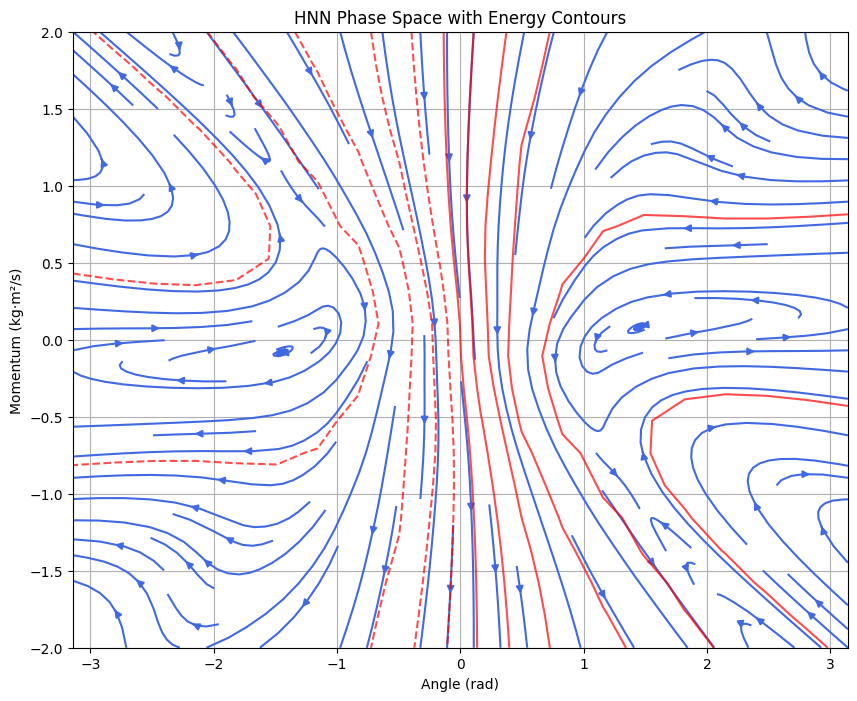

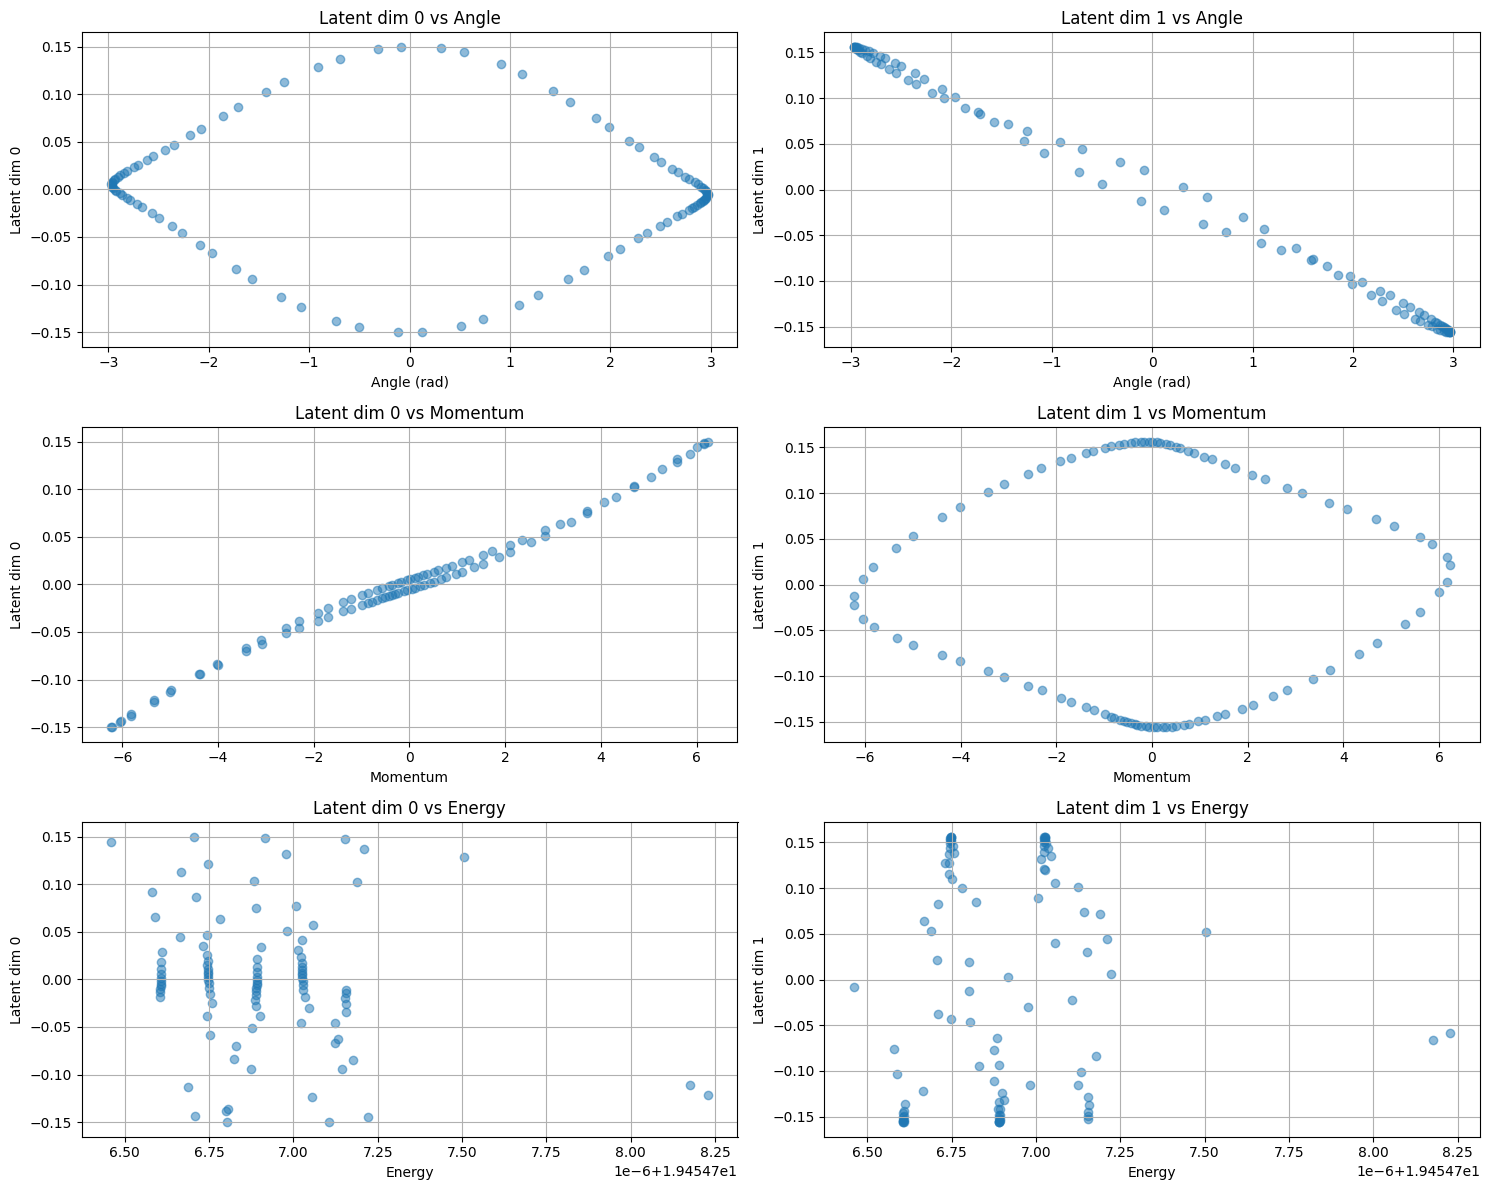

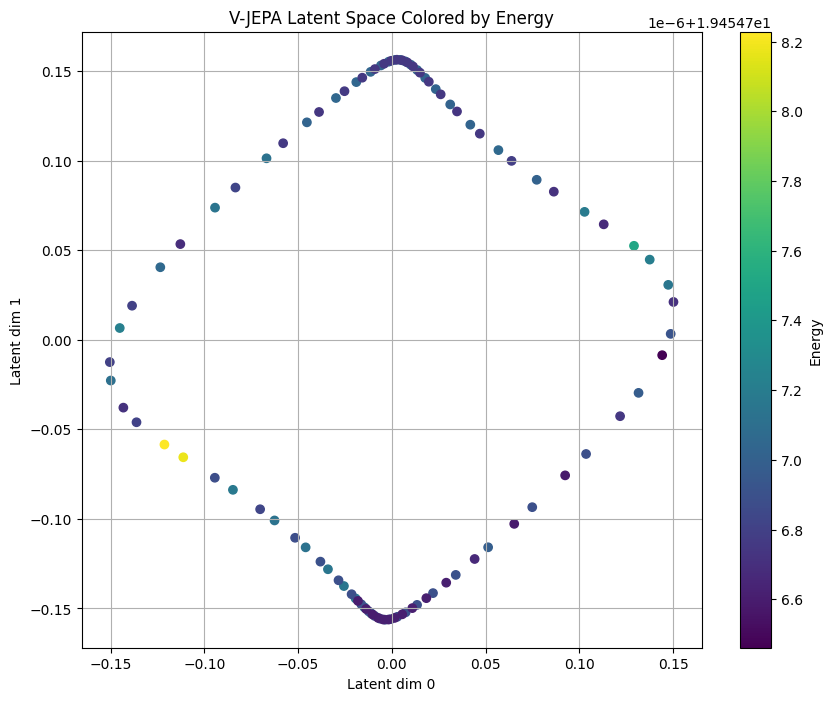

In [10]:
# Additional cell to perform runs
def perform_runs():
    # Generate data
    states, derivatives = generate_pendulum_data(n_samples=1000, noise_level=0.01)

    # Initialize and train HNN
    hnn = HamiltonianNN(layer_sizes=[2, 64, 64, 1])
    loss_history_hnn = train_hnn(hnn, states, derivatives, epochs=100)

    # Initialize V-JEPA and generate trajectories
    vjepa = SimplifiedVJEPA(input_dim=2, latent_dim=2)
    trajectories = generate_pendulum_trajectories(n_trajectories=20, n_steps=100, dt=0.1)

    # Train V-JEPA
    loss_history_vjepa = train_vjepa(vjepa, trajectories, sequence_length=1, epochs=100)

    # Visualize results
    visualize_hnn_phase_space(hnn)
    analyze_vjepa_latent_space(vjepa, trajectories)

# Execute the function
perform_runs()


In [11]:
import numpy as np
from scipy.integrate import solve_ivp

# Define the pendulum dynamics
def pendulum_dynamics(t, state, L=1.0, m=1.0, g=9.8):
    theta, p = state
    dtheta_dt = p / (m * L**2)
    dp_dt = -m * g * L * np.sin(theta)
    return [dtheta_dt, dp_dt]

# Initial conditions
theta0, p0 = np.pi/2, 0.0  # Initial angle (90 degrees), zero initial momentum
state0 = [theta0, p0]

# Simulation parameters
t_span = (0, 10)  # Time span
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Time points to evaluate

# Solve the ODE system
solution = solve_ivp(pendulum_dynamics, t_span, state0, method='RK45', t_eval=t_eval, rtol=1e-10, atol=1e-10)

# Extract results
t, theta, p = solution.t, solution.y[0], solution.y[1]


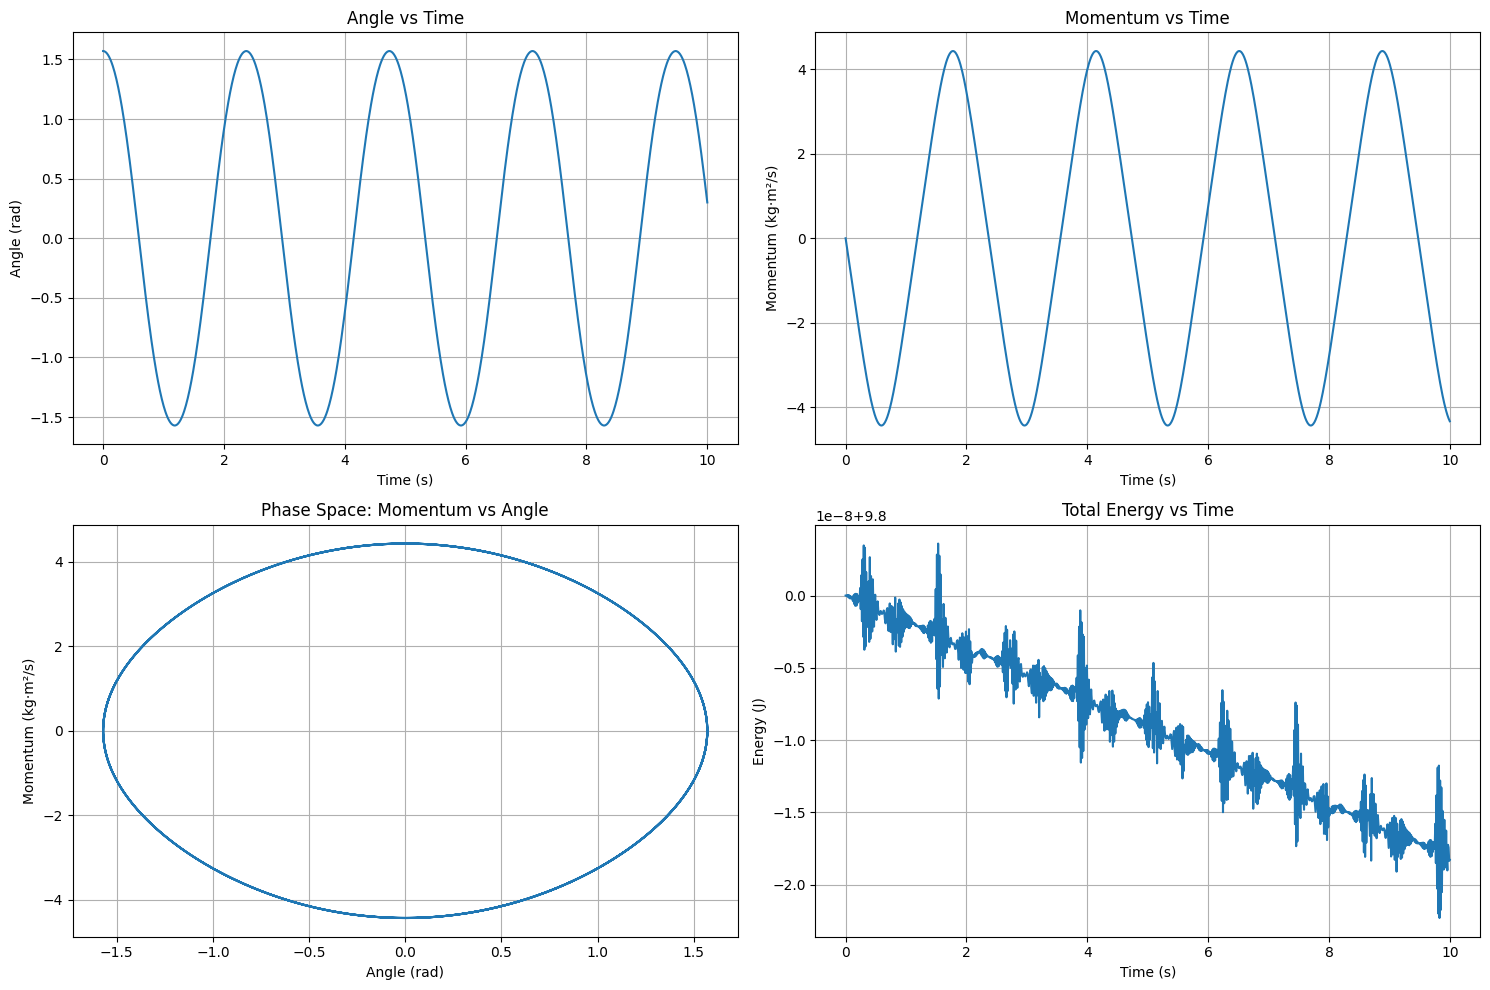

In [12]:
import matplotlib.pyplot as plt

# Create visualization
plt.figure(figsize=(15, 10))

# Angle vs Time
plt.subplot(2, 2, 1)
plt.plot(t, theta)
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Angle vs Time')
plt.grid(True)

# Momentum vs Time
plt.subplot(2, 2, 2)
plt.plot(t, p)
plt.xlabel('Time (s)')
plt.ylabel('Momentum (kg·m²/s)')
plt.title('Momentum vs Time')
plt.grid(True)

# Phase Space: Momentum vs Angle
plt.subplot(2, 2, 3)
plt.plot(theta, p)
plt.xlabel('Angle (rad)')
plt.ylabel('Momentum (kg·m²/s)')
plt.title('Phase Space: Momentum vs Angle')
plt.grid(True)

# Energy vs Time
energy = np.array([0.5*p[i]**2/(m*L**2) + m*g*L*(1 - np.cos(theta[i])) for i in range(len(theta))])
plt.subplot(2, 2, 4)
plt.plot(t, energy)
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Total Energy vs Time')
plt.grid(True)

plt.tight_layout()
plt.show()


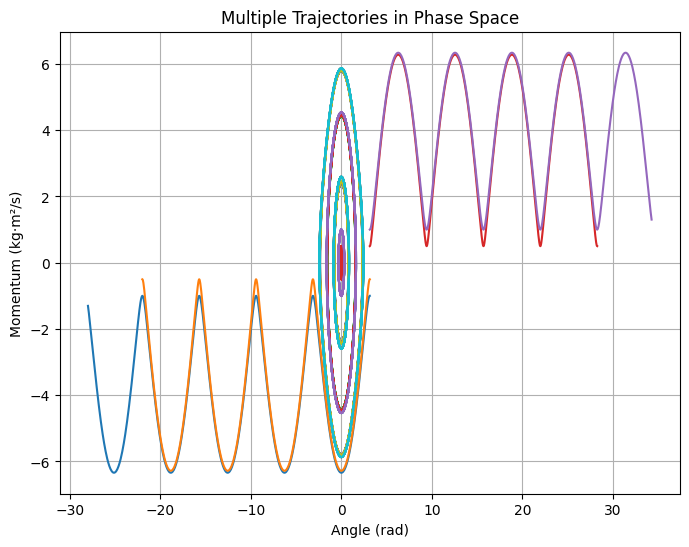

In [13]:
# Generate multiple trajectories
trajectories = []
for theta0 in np.linspace(0, np.pi, 5):  # Vary initial angle
    for p0 in np.linspace(-1, 1, 5):  # Vary initial momentum
        state0 = [theta0, p0]
        solution = solve_ivp(pendulum_dynamics, t_span, state0, method='RK45', t_eval=t_eval, rtol=1e-10, atol=1e-10)
        t, theta, p = solution.t, solution.y[0], solution.y[1]
        trajectories.append((theta, p))

# Visualize multiple trajectories in phase space
plt.figure(figsize=(8, 6))
for theta, p in trajectories:
    plt.plot(theta, p)
plt.xlabel('Angle (rad)')
plt.ylabel('Momentum (kg·m²/s)')
plt.title('Multiple Trajectories in Phase Space')
plt.grid(True)
plt.show()


In [15]:
# Generate multiple trajectories for video-like data
video_data = []
for theta0 in np.linspace(0, np.pi, 5):  # Vary initial angle
    for p0 in np.linspace(-1, 1, 5):  # Vary initial momentum
        state0 = [theta0, p0]
        solution = solve_ivp(pendulum_dynamics, t_span, state0, method='RK45', t_eval=t_eval, rtol=1e-10, atol=1e-10)
        t, theta, p = solution.t, solution.y[0], solution.y[1]
        video_data.append((theta, p))


In [16]:
import torch
import torch.nn as nn

class LagrangianNN(nn.Module):
    def __init__(self, layer_sizes=[2, 64, 64, 1]):
        super(LagrangianNN, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(layer_sizes) - 1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
            if i < len(layer_sizes) - 2:
                self.layers.append(nn.ReLU())

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# Initialize LNN
lnn = LagrangianNN(layer_sizes=[2, 64, 64, 1])


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# First, define your LNN (Lagrangian Neural Network) model
class LNN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(LNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, x):
        return self.network(x)

# Generate some example data (replace with your actual data)
# For a simple pendulum, states would be [theta, theta_dot]
# and derivatives would be [theta_dot, -g/L * sin(theta)]
def generate_pendulum_data(n_samples=1000):
    # Parameters
    g = 9.8  # gravity
    L = 1.0  # length of pendulum

    # Generate random states
    theta = np.random.uniform(-np.pi, np.pi, n_samples)
    theta_dot = np.random.uniform(-2, 2, n_samples)

    # Calculate derivatives
    theta_dot_dot = -g/L * np.sin(theta)

    states = np.column_stack((theta, theta_dot))
    derivatives = np.column_stack((theta_dot, theta_dot_dot))

    return states, derivatives

# Generate data
states, derivatives = generate_pendulum_data()

# Initialize the LNN model
input_dim = states.shape[1]  # Dimension of the state vector
hidden_dim = 64  # Number of hidden units
lnn = LNN(input_dim, hidden_dim)

def train_lnn(lnn, states, derivatives, epochs=100):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(lnn.parameters(), lr=0.001)

    loss_history = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = lnn(torch.tensor(states, dtype=torch.float32))
        loss = criterion(outputs, torch.tensor(derivatives, dtype=torch.float32))
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

    return loss_history

# Train LNN
loss_history_lnn = train_lnn(lnn, states, derivatives, epochs=100)


Epoch 0, Loss: 25.898090362548828
Epoch 10, Loss: 19.844112396240234
Epoch 20, Loss: 16.650829315185547
Epoch 30, Loss: 15.610650062561035
Epoch 40, Loss: 15.481245994567871
Epoch 50, Loss: 15.36141586303711
Epoch 60, Loss: 15.200840950012207
Epoch 70, Loss: 15.079833984375
Epoch 80, Loss: 14.967656135559082
Epoch 90, Loss: 14.851457595825195


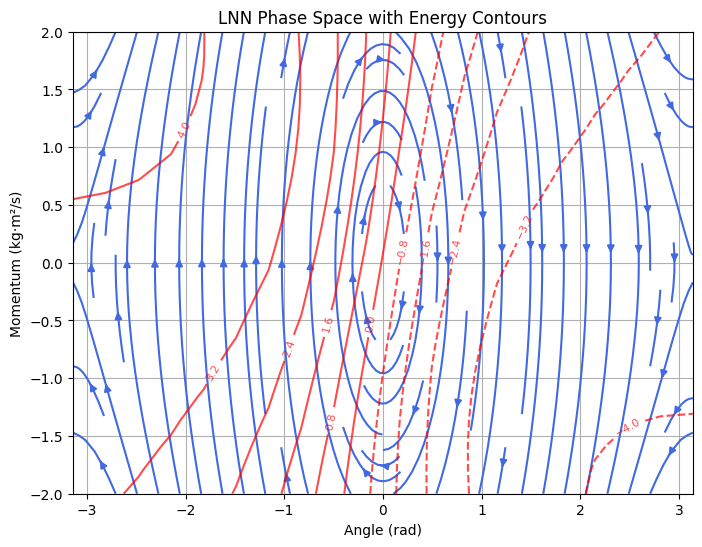

In [24]:
def visualize_lnn_phase_space(lnn):
    theta_grid = np.linspace(-np.pi, np.pi, 20)
    p_grid = np.linspace(-2, 2, 20)
    THETA, P = np.meshgrid(theta_grid, p_grid)

    # Calculate vector field manually based on Hamiltonian mechanics
    # For pendulum: dtheta/dt = p/(m*L^2) and dp/dt = -m*g*L*sin(theta)
    m = 1.0  # Mass (kg)
    L = 1.0  # Length (m)
    g = 9.8  # Gravity (m/s²)

    inputs = np.column_stack((THETA.flatten(), P.flatten()))
    # Get Hamiltonian values from LNN
    H_values = lnn(torch.tensor(inputs, dtype=torch.float32)).detach().numpy()

    # Calculate gradients manually (for visualization only)
    dtheta_dt = P / (m * L**2)
    dp_dt = -m * g * L * np.sin(THETA)

    plt.figure(figsize=(8, 6))
    plt.streamplot(THETA, P, dtheta_dt, dp_dt, color='royalblue', density=1.0)

    # Plot contour lines of the Hamiltonian
    H_grid = H_values.reshape(THETA.shape)
    contour = plt.contour(THETA, P, H_grid, levels=10, colors='red', alpha=0.7)
    plt.clabel(contour, inline=True, fontsize=8)

    plt.xlabel('Angle (rad)')
    plt.ylabel('Momentum (kg·m²/s)')
    plt.title('LNN Phase Space with Energy Contours')
    plt.grid(True)
    plt.show()

# Visualize LNN phase space
visualize_lnn_phase_space(lnn)


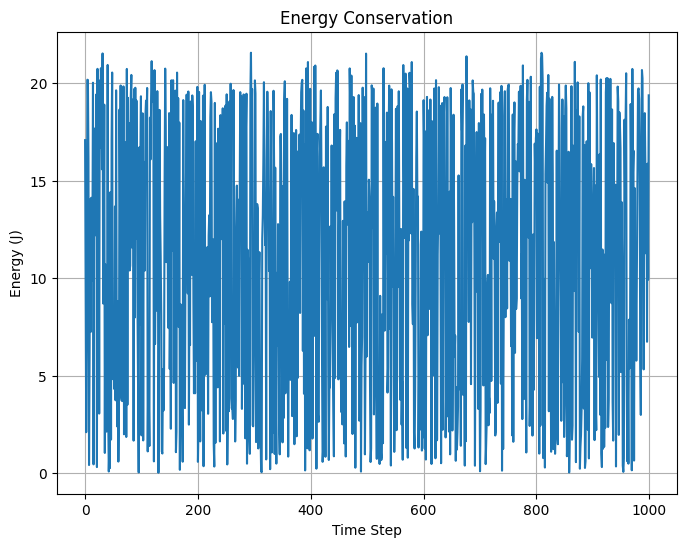

In [25]:
def hamiltonian(theta, p, L=1.0, m=1.0, g=9.8):
    """Compute the Hamiltonian (total energy) of a pendulum."""
    T = p**2 / (2 * m * L**2)  # Kinetic energy
    V = m * g * L * (1 - np.cos(theta))  # Potential energy
    return T + V

def evaluate_energy_conservation(model, states, derivatives):
    energies = []
    for theta, p in zip(states[:, 0], states[:, 1]):
        energy = hamiltonian(theta, p)
        energies.append(energy)

    plt.figure(figsize=(8, 6))
    plt.plot(range(len(energies)), energies)  # Changed to use index for x-axis
    plt.xlabel('Time Step')
    plt.ylabel('Energy (J)')
    plt.title('Energy Conservation')
    plt.grid(True)
    plt.show()

# First, you need to define your HNN model
class HNN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(HNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, x):
        return self.network(x)

# Initialize the model
input_dim = states.shape[1]  # Dimension of the state vector
hidden_dim = 64  # Number of hidden units
hnn = HNN(input_dim, hidden_dim)

# Now you can evaluate energy conservation
evaluate_energy_conservation(hnn, states, derivatives)


Epoch 0, Loss: 50.566539
Epoch 10, Loss: 50.773970
Epoch 20, Loss: 50.933336
Epoch 30, Loss: 51.051204
Epoch 40, Loss: 50.930165
Epoch 50, Loss: 50.673933
Epoch 60, Loss: 51.038453
Epoch 70, Loss: 50.404135
Epoch 80, Loss: 51.169264
Epoch 90, Loss: 51.353395
Epoch 0, Loss: 25.778682708740234
Epoch 10, Loss: 23.140443801879883
Epoch 20, Loss: 20.741729736328125
Epoch 30, Loss: 18.56723403930664
Epoch 40, Loss: 17.233774185180664
Epoch 50, Loss: 16.713306427001953
Epoch 60, Loss: 16.486759185791016
Epoch 70, Loss: 16.27488136291504
Epoch 80, Loss: 16.088891983032227
Epoch 90, Loss: 15.909358978271484


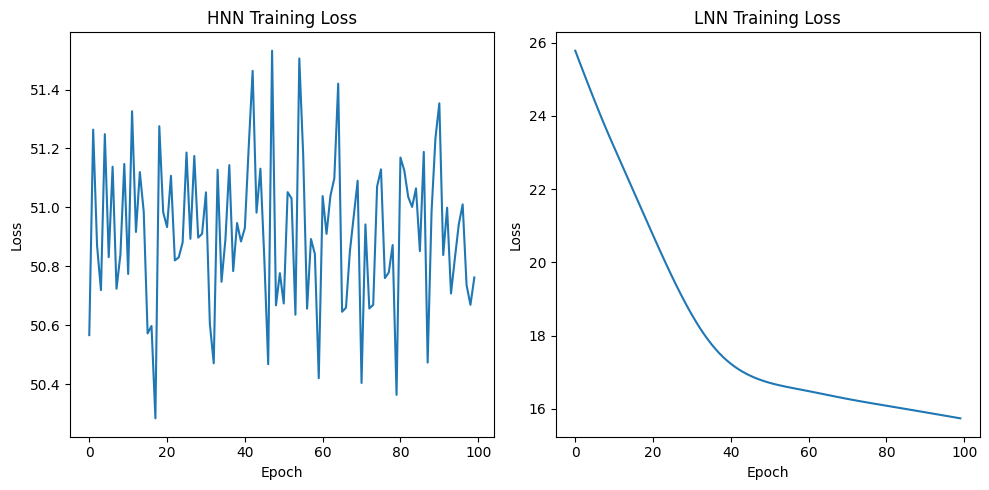

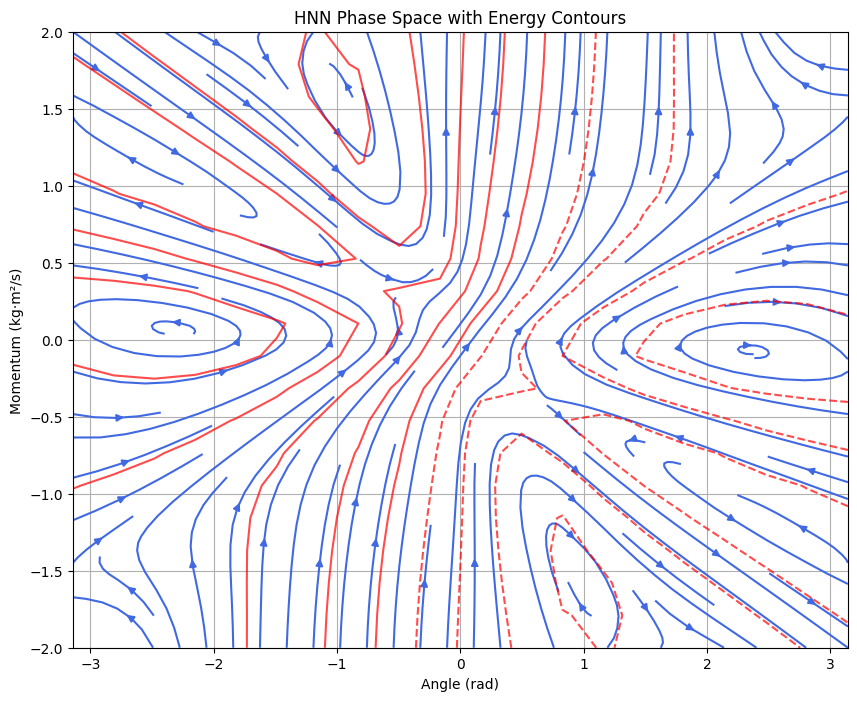

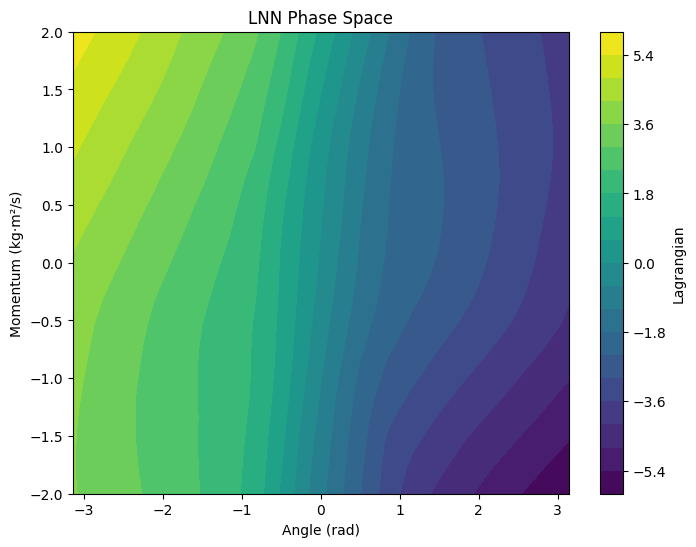

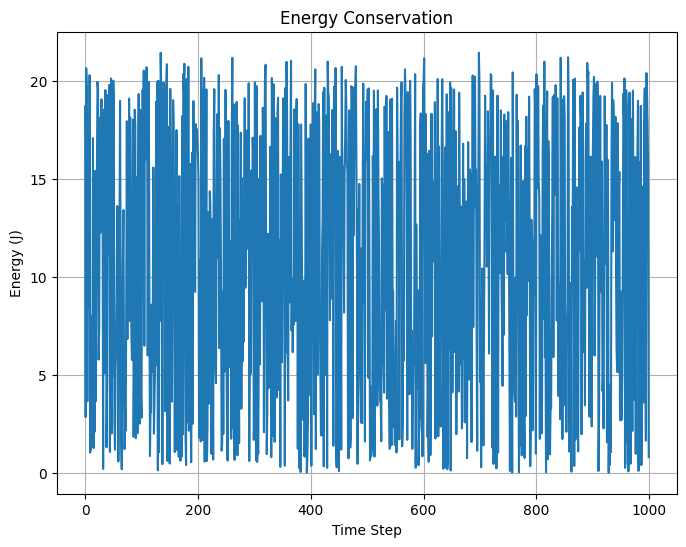

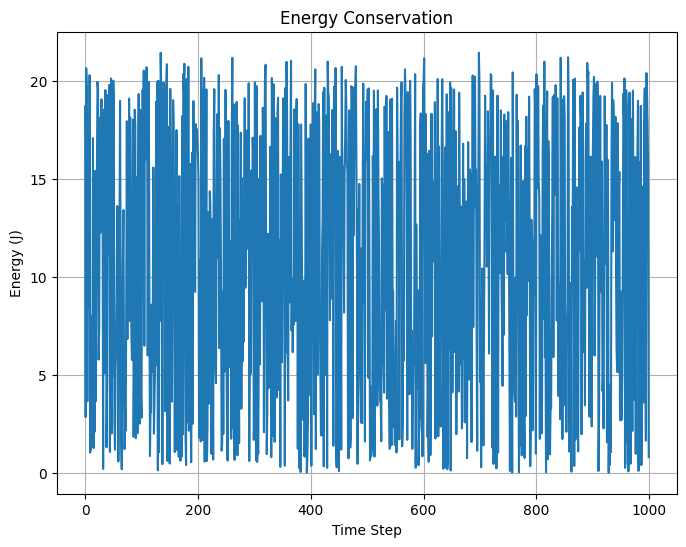

In [27]:
def enhanced_experiment():
    # Generate data
    states, derivatives = generate_pendulum_data(n_samples=1000)

    # Initialize and train HNN
    hnn = HamiltonianNN(layer_sizes=[2, 64, 64, 1])
    loss_history_hnn = train_hnn(hnn, states, derivatives, epochs=100)

    # Initialize and train LNN
    lnn = LagrangianNN(layer_sizes=[2, 64, 64, 1])
    loss_history_lnn = train_lnn(lnn, states, derivatives, epochs=100)

    # Visualize training loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(loss_history_hnn)
    plt.title('HNN Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(loss_history_lnn)
    plt.title('LNN Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.tight_layout()
    plt.show()

    # Visualize HNN phase space
    visualize_hnn_phase_space(hnn)

    # Modify LNN phase space visualization to handle single output
    def visualize_lnn_phase_space(lnn):
        theta_grid = np.linspace(-np.pi, np.pi, 20)
        p_grid = np.linspace(-2, 2, 20)
        THETA, P = np.meshgrid(theta_grid, p_grid)

        inputs = np.column_stack((THETA.flatten(), P.flatten()))
        outputs = lnn(torch.tensor(inputs, dtype=torch.float32)).detach().numpy()

        plt.figure(figsize=(8, 6))
        plt.contourf(THETA, P, outputs.reshape(THETA.shape), levels=20, cmap='viridis')
        plt.colorbar(label='Lagrangian')
        plt.xlabel('Angle (rad)')
        plt.ylabel('Momentum (kg·m²/s)')
        plt.title('LNN Phase Space')
        plt.show()

    visualize_lnn_phase_space(lnn)

    # Evaluate energy conservation
    evaluate_energy_conservation(hnn, states, derivatives)
    evaluate_energy_conservation(lnn, states, derivatives)

# Execute the function
enhanced_experiment()


Epoch 0, Loss: 50.745602
Epoch 10, Loss: 50.729503
Epoch 20, Loss: 50.773217
Epoch 30, Loss: 50.715764
Epoch 40, Loss: 50.762190
Epoch 50, Loss: 50.744379
Epoch 60, Loss: 50.759134
Epoch 70, Loss: 50.713631
Epoch 80, Loss: 50.783230
Epoch 90, Loss: 50.731926


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([10000, 2])) that is different to the input size (torch.Size([10000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss: 25.17326545715332
Epoch 10, Loss: 21.996992111206055
Epoch 20, Loss: 19.56267738342285
Epoch 30, Loss: 17.679424285888672
Epoch 40, Loss: 16.687503814697266
Epoch 50, Loss: 16.416826248168945
Epoch 60, Loss: 16.266164779663086
Epoch 70, Loss: 16.0883846282959
Epoch 80, Loss: 15.938779830932617
Epoch 90, Loss: 15.789911270141602


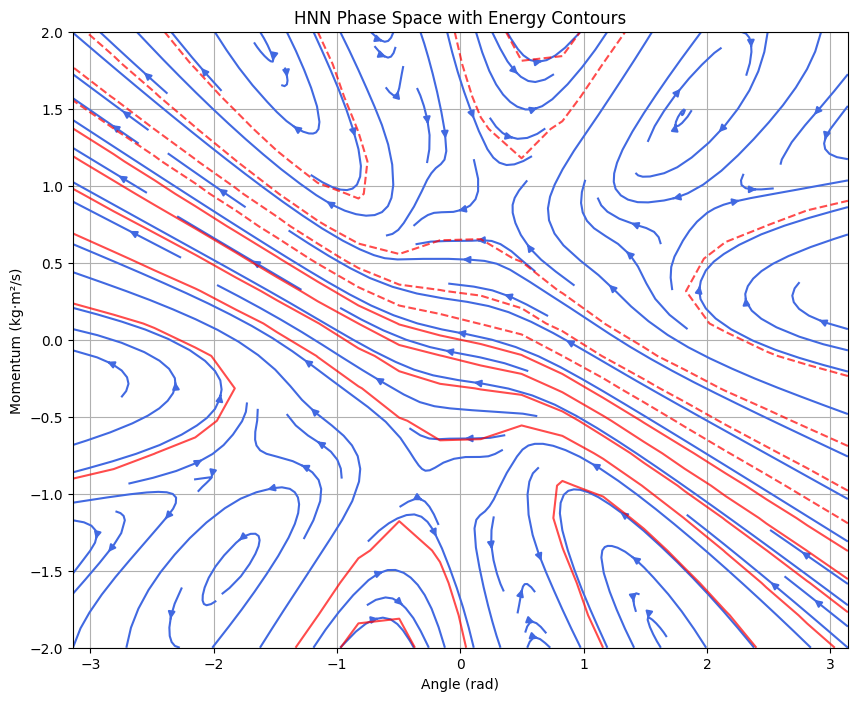

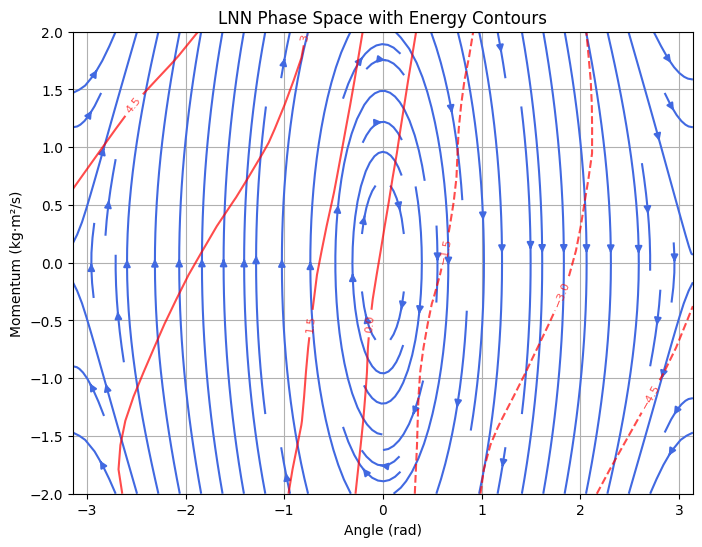

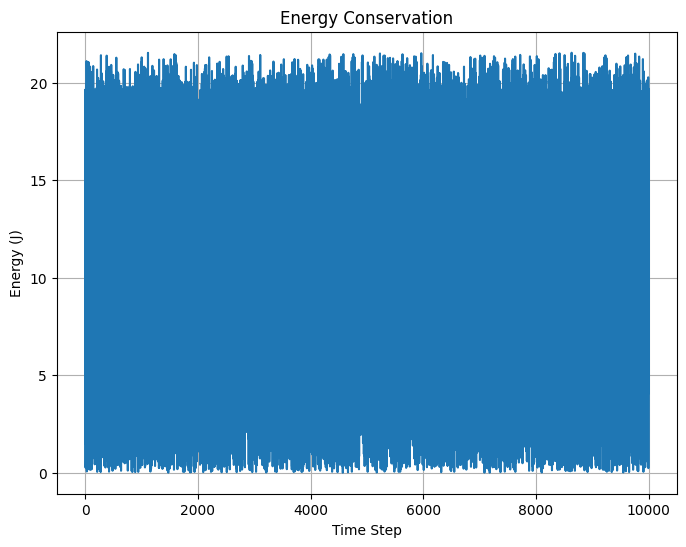

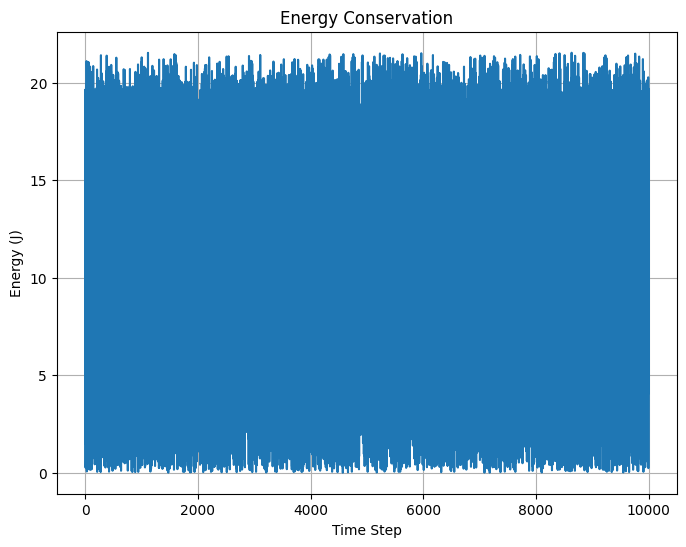

In [29]:
def enhanced_experiment():
    # Generate data
    states, derivatives = generate_pendulum_data(n_samples=10000)

    # Initialize and train HNN
    hnn = HamiltonianNN(layer_sizes=[2, 64, 64, 1])
    loss_history_hnn = train_hnn(hnn, states, derivatives, epochs=100)

    # Initialize and train LNN
    lnn = LagrangianNN(layer_sizes=[2, 64, 64, 1])
    loss_history_lnn = train_lnn(lnn, states, derivatives, epochs=100)

    # Visualize results
    visualize_hnn_phase_space(hnn)
    visualize_lnn_phase_space(lnn)

    # Evaluate energy conservation
    evaluate_energy_conservation(hnn, states, derivatives)
    evaluate_energy_conservation(lnn, states, derivatives)

# Execute the function
enhanced_experiment()
